In [ ]:
################################################################################
################################################################################
#################### Analyzing Series Data with Python #########################
################################################################################
################################################################################

# Data was extracted from a 64 list of longest running series by Season count
# from IMDB created by user yohmarit-143-626778 on 19 Feb. 2019
# Data was scraped using a custom Selenium-based WebScraper 

# The main objective of this preliminary analysis is to observer is there is
# a significant depreciation of a Series across Seasons. In order to analyze
# this Seasons will be grouped into three categories based on Season count.
# Early Seasons [1-3] // # Middle Seasons [4-6] // # Late Seasons [7-9]
# Additionally, we will cover Post-Late Seasons [10- ] anecdotally.

# 0. Brief description of the data
# 0.1 
#   Method of Extraction: Selenium WebScraper
# 0.2
#   WebScraper Results Preview

# 1. Filtering
# 1.1 
#   First we will filter for Series which have a minimun of 80%
#   non-null entries. This is because some of the series had many of our variables
#   of interest missing, as well as missing values due to faults of the WebScraper
#   which will be adressed at a later time. 
# 1.2 
#   An additional filtering process will be performed in which only Episodes with
#   at least 10 Number of Votes will be considered. This low entry point has been
#   established after a quick overview of the data which concluded that many of
#   the series present within the data have not gardnered the interest of current
#   IMDB users even if they were very influencial when they aired.

# 2. Analysis
# 2.1 Preliminary analysis
# 2.1.1 Airdate x Nº Episodes (|Scatter Plot|) due to the proportion between var.) # NEED TO CHANGE
#     Describes the distribution of our sample across time
# 2.1.2 Nº Seasons x Nº Episodes (|Bar Plot|)
#         Sub-Plot 1: Nº Seasons x Nº Episodes
#         Sub-Plot 2: Seasons[Early//Mid//Late] x Nº Episodes
#         Describes the distribution of Episodes across Seasons, will be used to 
#         evaluate if the sample is sufficient.
# 2.1.3 Nº Seasons x Nº of Votes (|Bar Plot|)
#         Sub-Plot 1: Nº Seasons x Nº of Votes
#         Sub-Plot 2: Seasons[Early//Mid//Late] x Nª of Votes
#         Describes the distribution of Nº of Votes across Seasons, could be 
#         interpreted as an indicator of engagement.
# 2.1.4 Nº Seasons x Season Average Rating (|Bar Plot|)
#         Sub-Plot 1: Nº Seasons x Season Average Rating
#         Sub-Plot 2: Seasons[Early//Mid//Late] x Season Average Rating
#         Drescribes the distribution of Rating across Seasons, could be interpreted
#         as an indicator of quality.
# 2.2 Analysis
#    Nº Seasons x Episode Rating (|Box Plot|)
#     Sub-Plot 1: Nº Seasons x Episode Rating 
#     Sub-Plot 2: Seasons[Early//Mid//Late] x Episode Rating
#     We will determine if there is significant differences between Season group
#     pairs by establishing a 95% significance treshhold.                                          ################## REVISIT ################
#     Variance will also be analyzed as an indicator of quality consistency 
#     across seasons and season blocks.   


In [ ]:
################################################################################
################################################################################
############# 0.1 Method of Extraction: Selenium WebScraper ####################
################################################################################
################################################################################

# Importing necesary libraries:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import time
from datetime import datetime


# Initial Set Up

## Setting up the selenium driver and opening the relevant URL
driver = webdriver.Chrome("C:\\Users\\chiaw\\Desktop\\Portfolio Projects\\Movie Analysis\\chromedriver_win32\\chromedriver.exe")
url = 'https://www.imdb.com/list/ls043477524/'
driver.get(url)
## Wait function to halt processing until HTML code is obtainable
wait = WebDriverWait(driver, 40)

## Establishing dictionaries and function in order to format data
rep = {",": "", "(": "", ")":""}
rep_season = {"S":"", ",":""}

def replace_all(text, dic):
    for i, j in dic.items():
        text = text.replace(i, j)
    return text

## Initializing lists which will contain each of our desired variables
Series_Name = []
Episode_Name = []
Episode_Season = []
Episode_Number = []
Episode_Airdate = []
Episode_Rating = []
Number_Ratings = []



# Once everything is set up we proceed to the main code:

## Gather the URLs from the series present within yohmarit-143-626778's list of
# series and saving them onto our list List_Url:
Show_List = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME, 'lister-item-header')))
List_Url = []
for elem in range(0, len(Show_List)):
    List_Url.append(Show_List[elem].find_element_by_tag_name('a').get_attribute('href'))

## Main for loop which goes through each of the URLs from our List_Url,
## adittionaly we identify the WebElement which enables us to go through seasons
## and the number of said seasons which we use in our next for loop.
for url in range(0, len(List_Url)):
    driver.get(List_Url[url])
    Episode_Button = wait.until(EC.presence_of_element_located((By.CLASS_NAME, 'ipc-title-link-wrapper')))
    driver.get(Episode_Button.get_attribute('href'))
    Season_Selector = driver.find_element_by_id('bySeason').find_elements_by_tag_name('option')

### Sub for loop which goes through each of the seasons identified within the
### previous for loop. Within this loop we identify the WebElements which 
### contain our desired variables. In the case of IMDB it is two elements: 
### 'list_item.odd' and 'list_item.even'. Note: We once again add Season_Selector
### in order to navigate through the seasons through each loop.
    for button in range(0, len(Season_Selector)):
        Button = Season_Selector[button]
        Button.click()
        time.sleep(5)
        Season_Selector = driver.find_element_by_id('bySeason').find_elements_by_tag_name('option')
        List_Webelements = ['list_item.odd', 'list_item.even']                                   

        # We obtain our first desired variable which is the Name of the Series
        s_name = driver.find_element_by_class_name('parent').find_element_by_tag_name('a').text  # Selecting Series Name

#### For loop responsible for extracting the values of our desired variables.
#### It loops through the series//season page first gathering the relevant 
#### variables from each 'list_item.odd' before going through 'list_item.even'
#### thus the resulting list will contain all the odd numbered episodes of each
#### season first and then all the even numbered ones.
        for elem in List_Webelements:                                                            
            Episode_Block = driver.find_elements_by_class_name(elem)
            n_episodes = len(Episode_Block)

##### For loop where we extract each episode's data:
            for i in range(0, n_episodes): 

##### Note: If the HTML WebElement is not found or the WebElement's content is 
##### not correctly formated the code will return an empty value 'NONE', this is
##### true for every variable we are extracting.

##### Extracting and formating our variable Airdata. 
                try:
                    e_airdate = Episode_Block[i].find_element_by_class_name('airdate').text      
                    if len(e_airdate) == 0:
                        e_airdate = None
                    else:
                        e_airdate = e_airdate.split()                                                
                        if len(e_airdate[0]) == 1:                                                   
                            e_airdate[0] = '0' + e_airdate[0]                                        
                            e_airdate[1] = e_airdate[1].replace('.', '')                             
                            e_airdate = e_airdate[0] + e_airdate[1] + e_airdate[2]                   
                            e_airdate = datetime.strptime(e_airdate, '%d%b%Y')                       
                        elif len(e_airdate[0]) == 2:                                                 # Redundant Code Fixable
                            e_airdate[1] = e_airdate[1].replace('.', '')                             # Redundant Code Fixable
                            e_airdate = e_airdate[0] + e_airdate[1] + e_airdate[2]                   # Redundant Code Fixable
                            e_airdate = datetime.strptime(e_airdate, '%d%b%Y')                       # Redundant Code Fixable
                        elif len(e_airdate[0]) == 4:                                                 
                            if e_airdate[0][3] == '.':
                                e_airdate[0] = e_airdate[0].replace('.', '')
                                e_airdate = e_airdate[0] + e_airdate[1]
                                e_airdate = datetime.strptime(e_airdate, '%b%Y')
                            else:
                                e_airdate = datetime.strptime(e_airdate[0], '%Y')                       
                except NoSuchElementException:
                    e_airdate = None
##### Extracting and formating our variable Rating
                try:
                    e_rating = Episode_Block[i].find_element_by_class_name('ipl-rating-star__rating').text
                    if len(e_rating) == 0:
                       e_rating = None
                    else:
                        e_rating = float(e_rating)
                except NoSuchElementException:
                    e_rating = None
##### Extracting and formating our variable Number of Votes
                try:
                    e_votes = replace_all(Episode_Block[i].find_element_by_class_name('ipl-rating-star__total-votes').text, rep)
                    if len(e_votes) == 0:
                        e_votes = None
                    else:
                        e_votes = int(e_votes)
                except NoSuchElementException:
                    e_votes = None
##### Extracting and formating our variable Season and Episode Number
##### Note: This is curretly problematic as it returns an empty value 'NONE'
##### when an the preview image of the episode is not present. Since both
##### e_index (Season & Episode Number) and e_title (Name of Episode) are 
##### dependant on each other due to the extraction method relying on indexing
##### both usually fail and MUST BE FIXED for further projects.
                try:
                    e_index = Episode_Block[i].find_elements_by_tag_name('a')[0].text
                    if len(e_index) > 0:
                        if e_index[0] == 'S':
                            e_season = int(replace_all(e_index.split()[0], rep_season).strip())                    # Needs fixing to include non-image episodes
                            e_number = int(e_index.split()[1].replace('Ep', '').strip())
                        else:
                            e_season = None
                            e_number = None
                    else:
                        e_season = None
                        e_number = None
                except NoSuchElementException:
                    e_season = None
                    e_number = None
##### Extracting and formating our variable Episode Name
                try:
                    e_title = Episode_Block[i].find_elements_by_tag_name('a')[1].text                               # Needs fixing to include non-image episodes
                    if len(e_title) == 0:
                        e_title = Episode_Block[i].find_elements_by_tag_name('a')[3].text
                        if len(e_title) == 0:
                            e_title = None
                        e_title = None
                except NoSuchElementException:
                    e_title = None
##### Saving each of our variables onto their corresponding lists
                Episode_Name.append(e_title)      # Saving Episode Name as Str
                Episode_Season.append(e_season)   # Saving Season Number as Int
                Episode_Number.append(e_number)   # Saving Episode Number as Int
                Episode_Airdate.append(e_airdate) # Saving AirDate as DateTime
                Episode_Rating.append(e_rating)   # Saving Episode Rating as Flt
                Number_Ratings.append(e_votes)    # Saving Number of Votes as Int
                Series_Name.append(s_name)        # Saving Series Name
                time.sleep(2)



# Evaluation of our Output

## Checking for number of null values per list will give us an idea of the 
## quality of the gathered data:
print("There was " + str(Series_Name.count(None)) + " number of null values within the Series Name list")
print("There was " + str(Episode_Name.count(None)) + " number of null values within the Episode Name list")
print("There was " + str(Episode_Season.count(None)) + " number of null values within the Episode Season list")
print("There was " + str(Episode_Number.count(None)) + " number of null values within the Episode Number list")
print("There was " + str(Episode_Airdate.count(None)) + " number of null values within the Episode Airdate list")
print("There was " + str(Episode_Rating.count(None)) + " number of null values within the Episode Rating list")
print("There was " + str(Number_Ratings.count(None)) + " number of null values within the Number Ratings list")

## Checking that all lists have the same length is crutial, since we will rearrange
## our data depending on the list's indices.
lists = [Series_Name,
Episode_Name,
Episode_Season,
Episode_Number,
Episode_Airdate,
Episode_Rating,
Number_Ratings]
it = iter(lists)
the_len = len(next(it))
if not all(len(l) == the_len for l in it):
     raise ValueError('not all lists have same length!')
else:
    print("All good")

# Lastly we format our data into a Pandas DataFrame:
## Further formating is possible but not necessary for the purpose of our 
## of this project
Data_List = [Series_Name, Episode_Season, Episode_Number, Episode_Name, Episode_Rating, Number_Ratings, Episode_Airdate]
df = pd.DataFrame(Data_List)
df = df.T
columns = ['Series Name', 'Season', 'Episode Number', 'Episode Name', 'Rating', 'Number of Votes', 'Airdate']
df.columns = columns

# Save data on to current directory:
df.to_csv('Series_Data_Final', index = False)


In [3]:
################################################################################
################################################################################
###################### 0.2 WebScraper Results Preview ##########################
################################################################################
################################################################################
import pandas as pd
path = "/content/drive/MyDrive/Series_Data_Final"
df = pd.read_csv(path)
df.head()

,Series Name,Season,Episode Number,Episode Name,Rating,Number of Votes,Airdate
0,The Simpsons,1.0,1.0,Simpsons Roasting on an Open Fire,8.1,7640.0,1989-12-17
1,The Simpsons,1.0,3.0,Homer's Odyssey,7.3,4502.0,1990-01-21
2,The Simpsons,1.0,5.0,Bart the General,7.9,4761.0,1990-02-04
3,The Simpsons,1.0,7.0,The Call of the Simpsons,7.7,4154.0,1990-02-18
4,The Simpsons,1.0,9.0,Life on the Fast Lane,7.4,3970.0,1990-03-18


In [ ]:
################################################################################
################################################################################
############################### 1.1 Filtering ##################################
################################################################################
################################################################################

# We will now filter for series with more than 20% of their values missing
import pandas as pd
import numpy as np
import math 
path = "/content/drive/MyDrive/Series_Data_Final"
df = pd.read_csv(path)

Series_List = df['Series Name'].unique()
Series_Name = []

Missing_Series = []
Total_Series = []
Percentage = []
Missing_Values = 0
index = 0
for series in range(0, len(Series_List)):
  Missing_Values = 0
  for episode in range(index, len(
      df[df['Series Name'] == Series_List[series]]) + index) :
    for variable in range(0, 7):
      variable_value = df[df['Series Name']==Series_List[series]].loc[episode][variable]
      print(variable_value)
      if type(variable_value) == np.float64:
        if math.isnan(variable_value) == True:
          Missing_Values = Missing_Values + 1
          print(Missing_Values)
          break
    index = index + 1
    if index == len(df):
      break
  Missing_Series.append(Missing_Values)
  print(Missing_Values)
  Total_Series.append(len(df[df['Series Name']==Series_List[series]]))
  total = len(df[df['Series Name']==Series_List[series]])
  Percentage.append(((total-Missing_Values)*100)/total)


Filter_1 = [Total_Series, Missing_Series, Percentage]                            # Can made cleaner
Filter_1 = pd.DataFrame(Filter_1)
Filter_1.columns = Series_List
Filter = Filter_1.T
Filter.columns = ['Total Episodes', 'Missing values', 'Percentage']
# These are the series we are going to exclude:
Filter[Filter['Percentage']<80]
# So we will procede with the following DataFrame onto the next filtering:
df_F = Filter[Filter['Percentage']>=80]
Series_List_F = df_F.T.columns
Series_List_F = list(Series_List_F)
df_F1 = df[df['Series Name'].isin(Series_List_F)]
df_F1_1 = df_F1.reset_index()
df_F1_1
# At the end of this process we are left with 51 series out of the 64 we started
# with. 

Se han truncado las últimas 5000 líneas del flujo de salida.
2012-01-25
CSI: Crime Scene Investigation
12.0
14.0
Seeing Red
7.5
619.0
2012-02-15
CSI: Crime Scene Investigation
12.0
16.0
CSI Unplugged
7.7
610.0
2012-02-29
CSI: Crime Scene Investigation
12.0
18.0
Malice in Wonderland
7.6
627.0
2012-03-21
CSI: Crime Scene Investigation
12.0
20.0
Altered Stakes
7.5
546.0
2012-04-11
CSI: Crime Scene Investigation
12.0
22.0
Homecoming
8.3
597.0
2012-05-09
CSI: Crime Scene Investigation
13.0
1.0
Karma to Burn
7.6
571.0
2012-09-26
CSI: Crime Scene Investigation
13.0
3.0
Wild Flowers
7.7
464.0
2012-10-17
CSI: Crime Scene Investigation
13.0
5.0
Play Dead
7.9
473.0
2012-10-31
CSI: Crime Scene Investigation
13.0
7.0
Fallen Angels
7.6
414.0
2012-11-14
CSI: Crime Scene Investigation
13.0
9.0
Strip Maul
7.6
404.0
2012-11-28
CSI: Crime Scene Investigation
13.0
11.0
Dead Air
7.6
410.0
2013-01-16
CSI: Crime Scene Investigation
13.0
13.0
In Vino Veritas
7.4
422.0
2013-02-06
CSI: Crime Scene Investigation

In [4]:
################################################################################
################################################################################
############################### 1.2 Filtering ##################################
################################################################################
################################################################################
df_F1_2 = df_F1_1[df_F1_1['Number of Votes']>=10]
# Renaming variable to something more convenient like df_a for analysis
df_a = df_F1_2.drop(['index'], axis = 1)
df_a

,Series Name,Season,Episode Number,Episode Name,Rating,Number of Votes,Airdate
0,The Simpsons,1.0,1.0,Simpsons Roasting on an Open Fire,8.1,7640.0,1989-12-17
1,The Simpsons,1.0,3.0,Homer's Odyssey,7.3,4502.0,1990-01-21
2,The Simpsons,1.0,5.0,Bart the General,7.9,4761.0,1990-02-04
3,The Simpsons,1.0,7.0,The Call of the Simpsons,7.7,4154.0,1990-02-18
4,The Simpsons,1.0,9.0,Life on the Fast Lane,7.4,3970.0,1990-03-18
...,...,...,...,...,...,...,...
15405,The Middle,9.0,16.0,The Crying Game,7.6,224.0,2018-03-13
15406,The Middle,9.0,18.0,Thank You for Not Kissing,7.5,224.0,2018-04-03
15407,The Middle,9.0,20.0,Great Heckspectations,8.1,236.0,2018-05-01
15408,The Middle,9.0,22.0,Split Decision,8.1,244.0,2018-05-15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Text(0, 0.5, 'AVG Rating')

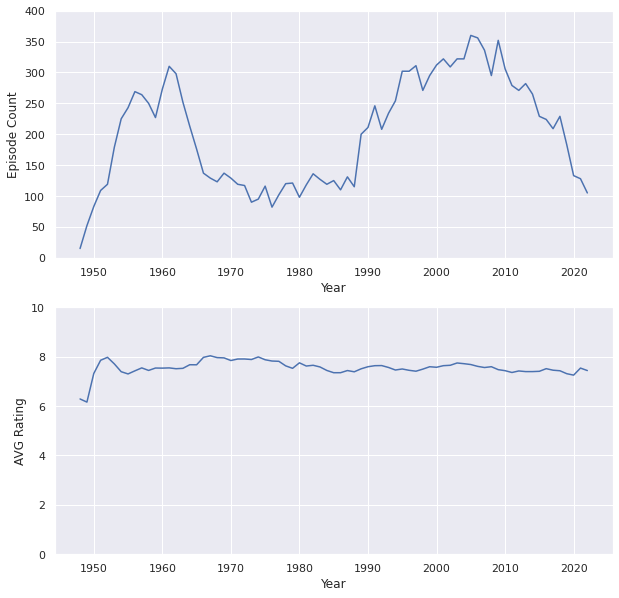

In [5]:
# Group by Year
## Importing libraries
import seaborn as sns
import matplotlib.pyplot as plt

## Creating the df to plot
df_a['Airdate'] = pd.to_datetime(df['Airdate'])
df_a_time = df_a[['Airdate', 'Rating']]
df_a_time['Count'] = 1
df_a_time_year = df_a_time[['Airdate','Rating']].groupby(df_a_time['Airdate'].dt.year).mean()
df_a_time_year['Count'] = df_a_time['Count'].groupby(df_a_time['Airdate'].dt.year).count()
df_a_time_year

## Plotting using seaborn
sns.set(rc = {'figure.figsize':(10,10)})
sns.set_style("darkgrid")

fig, axes = plt.subplots(2, 1)

ax1 = sns.lineplot(data = df_a_time_year, x = 'Airdate', y = 'Count', ax=axes[0])
ax1.set(ylim = (0, 400))
ax1.set_xlabel("Year")
ax1.set_ylabel("Episode Count")

ax2 = sns.lineplot(data = df_a_time_year, x = 'Airdate', y = 'Rating', ax=axes[1])
ax2.set(ylim = (0, 10))
ax2.set_xlabel("Year")
ax2.set_ylabel("AVG Rating")

# Our first figure (ax1) describes the distribution of the number of episodes 
# across time, grouped by Year. As we can observe it takes the form of a bimodal 
# distribution with the first peak ranging between the years [1950~1970] and 
# [1990~2020]. However, as shown by our second figure (ax2) which describes rating 
# distribution across time grouped by Year, it does not affect Rating in any 
# significant maner as it stays well within the [6-8] point range. Note: The 
# initial rating dip is mostlikely caused by the small sample size before 1950.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, nam

Text(0, 0.5, 'Series Count')

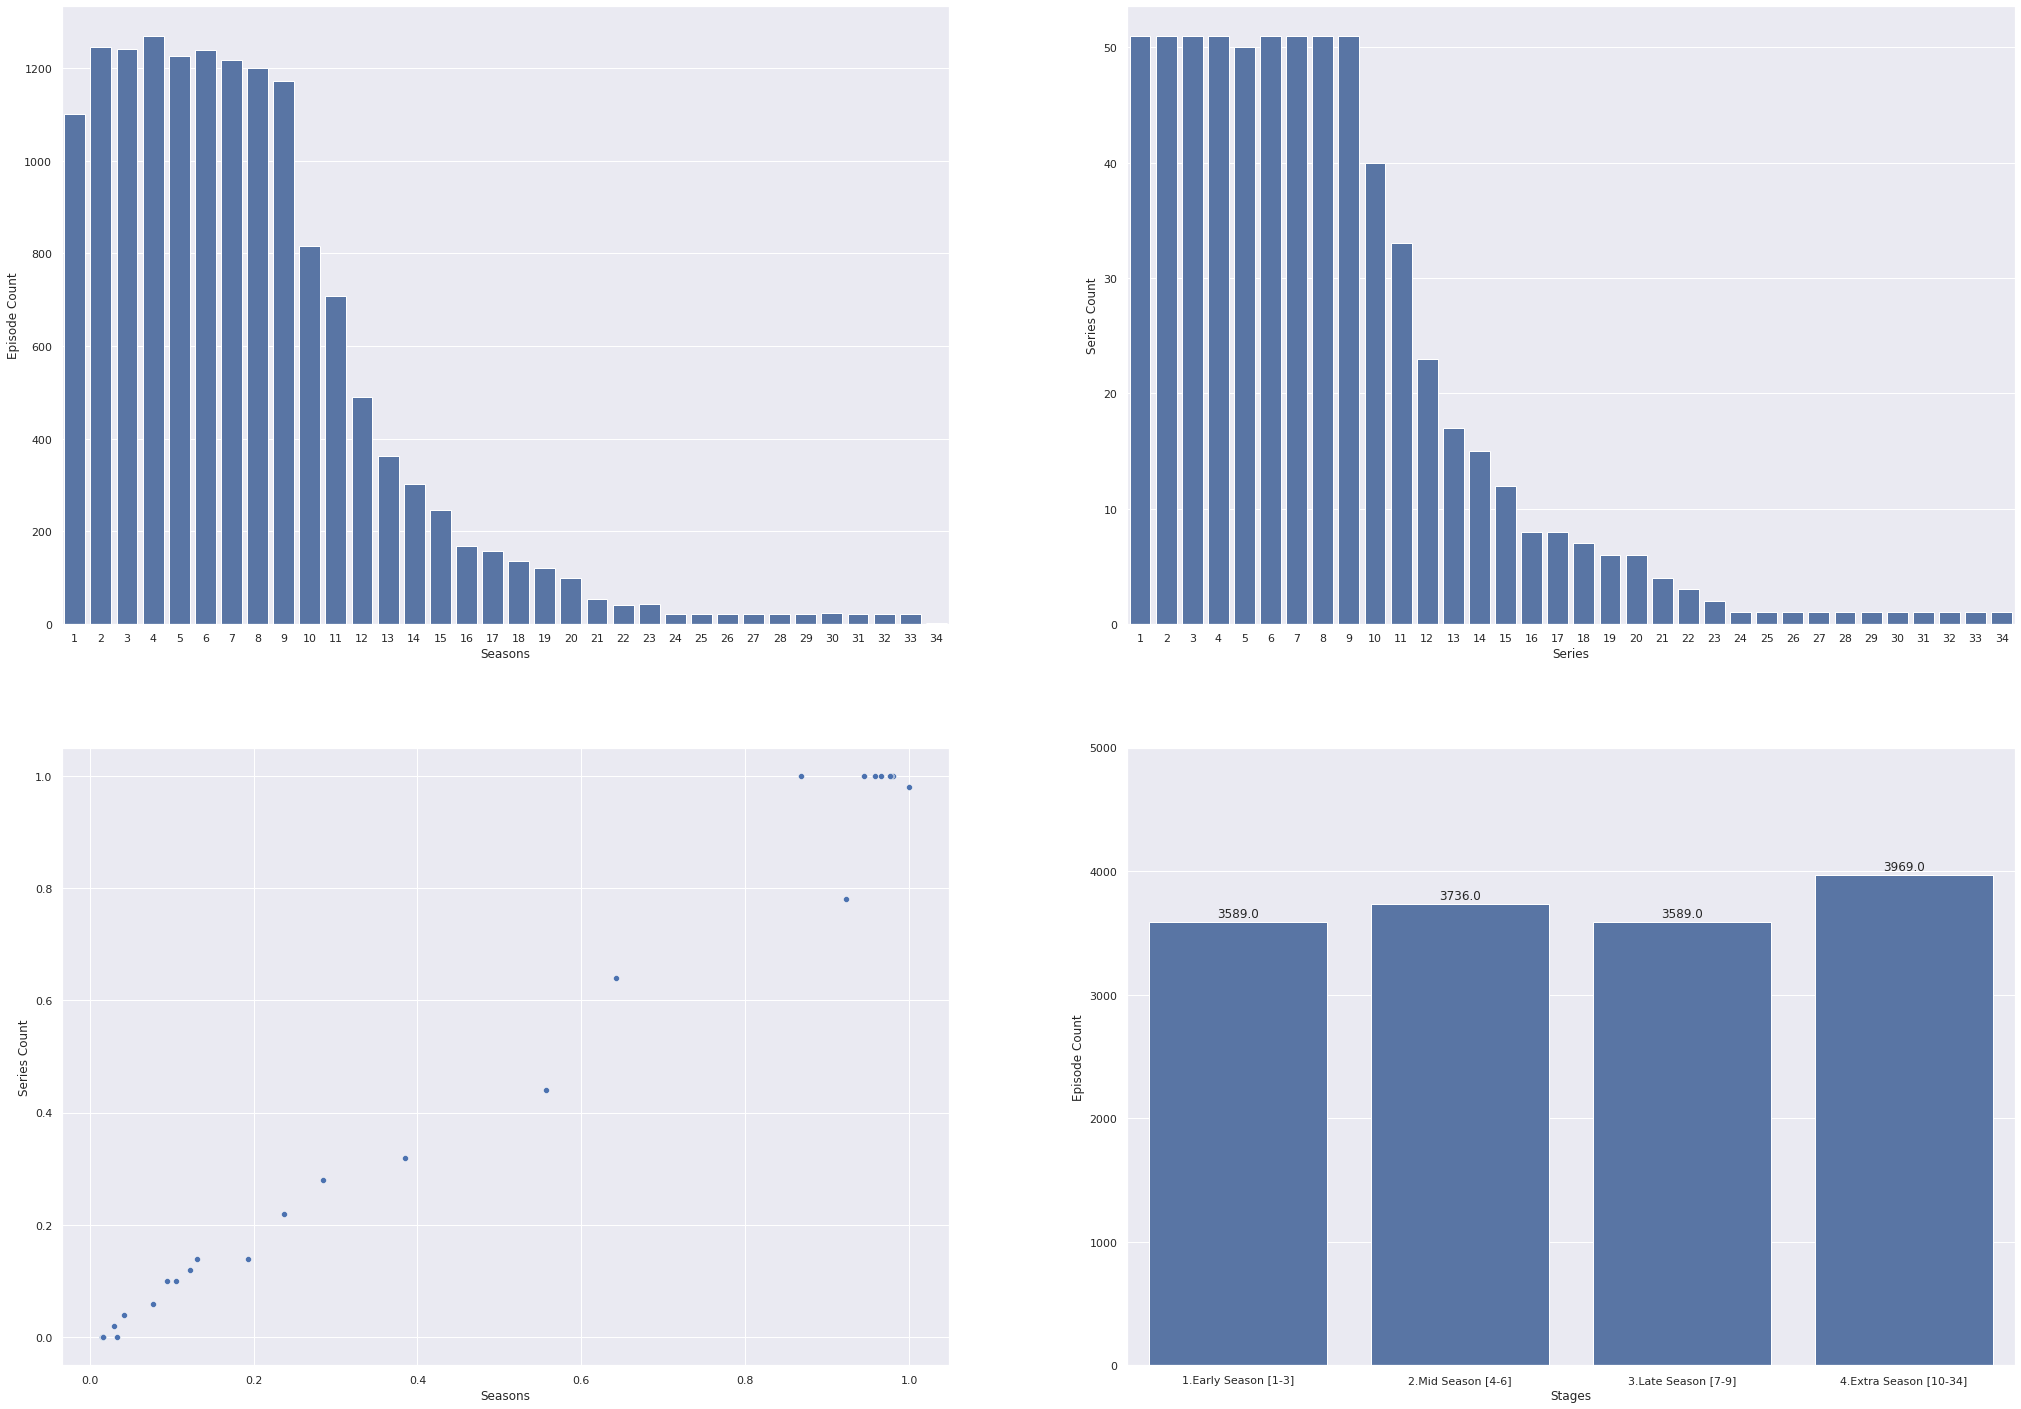

In [6]:
# Group by Season

## Importing libraries
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt



## Creating the necessary DataFrames
### DataFrame ax = 1
df_a_season = df_a[['Season', 'Episode Number']]
df_a_season['Count'] = 1
df_a_season_count = df_a_season['Count'].groupby(df_a_season['Season']).count()
df_a_season_count = pd.DataFrame(df_a_season_count)
df_a_season_count.index = df_a_season_count.index.astype(int)

### DataFrame ax = 2
df_a_season_count_stage = df_a_season_count
df_a_season_count_stage['Stage'] = math.nan

for elem in df_a_season_count_stage.index:
  if elem <= 3:
    df_a_season_count_stage['Stage'][elem] = '1.Early Season [1-3]'
  elif elem >= 4 and elem < 7:
    df_a_season_count_stage['Stage'][elem] = '2.Mid Season [4-6]'
  elif elem >= 7 and elem < 10:
    df_a_season_count_stage['Stage'][elem] = '3.Late Season [7-9]'
  else:
    df_a_season_count_stage['Stage'][elem] = '4.Extra Season [10-34]'

df_a_season_count_stage_grouped = df_a_season_count_stage['Count'].groupby(df_a_season_count_stage['Stage']).sum() 
df_a_season_count_stage_grouped = pd.DataFrame(df_a_season_count_stage_grouped)
df_a_season_count_stage_grouped




### DataFrame ax = 3
df_a_season_series = df_a[['Season', 'Series Name']]

df_a_season_series_grouped = pd.DataFrame(df_a_season_series['Series Name'].groupby(df_a_season_series['Season']))

df_a_season_series_grouped_demo = []

for elem in range(0, len(df_a_season_series_grouped[1])):
  num_series = len(df_a_season_series_grouped[1][elem].unique())
  df_a_season_series_grouped_demo.append(num_series)

df_a_season_series_grouped_demo = pd.DataFrame(df_a_season_series_grouped_demo)
df_a_season_series_grouped_demo.columns = ['Series Count']
df_a_season_series_grouped_demo['Season'] = math.nan

count = 0
for i in range(0, len(df_a_season_series_grouped_demo['Season'])):
  count = count + 1
  df_a_season_series_grouped_demo['Season'][i] = count

df_a_season_series_grouped_demo['Season'] = df_a_season_series_grouped_demo['Season'].astype(int)

### DataFrame ax = 4
df_a_corr_season = df_a_season_count['Count']
df_a_corr_season = pd.DataFrame(df_a_corr_season)
df_a_corr_season['Series Count'] = df_a_season_series_grouped_demo['Series Count']

df_a_corr_season
#### Calculating Person Correlation (Result: 0.99424)
df_a_corr_season.corr()   

#### Normalizing Data

df_a_corr_season_normalized = (df_a_corr_season-df_a_corr_season.min())/(df_a_corr_season.max()-df_a_corr_season.min())



## Plotting using seaborn
### Function to add bar values on top of them
### (FROM: https://www.statology.org/seaborn-barplot-show-values/)
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

### Plot set up
sns.set(rc = {'figure.figsize':(35,25)})
sns.set_style("darkgrid")

fig, axes = plt.subplots(2, 2)

ax1 = sns.barplot(data = df_a_season_count, 
                  x = df_a_season_count.index, y = 'Count', 
                  ax=axes[0,0], color = 'b')
ax1.set_xlabel("Seasons")
ax1.set_ylabel("Episode Count")


ax2 = sns.barplot(data = df_a_season_count_stage_grouped, 
                  x = df_a_season_count_stage_grouped.index, y = 'Count', 
                  ax=axes[1,1], color = 'b')
ax2.set(ylim = (0, 5000))
ax2.set_xlabel("Stages")
ax2.set_ylabel("Episode Count")
show_values(ax2)


ax3 = sns.barplot(data = df_a_season_series_grouped_demo, 
                  x = 'Season', y = 'Series Count', 
                  ax=axes[0,1], color = 'b')
ax3.set_xlabel("Series")
ax3.set_ylabel("Series Count")
# fig.delaxes(axes[1][1])

ax4 = sns.scatterplot(data = df_a_corr_season_normalized,
                    x = 'Count', y = 'Series Count',
                   ax=axes[1,0])
ax4.set_xlabel("Seasons")
ax4.set_ylabel("Series Count")


# Our first figure here ax1, (Top-Left) describes the number of episodes within
# our sample across seasons. At first glance it seems clear that our distribution
# is right-skewed, with values remaining fairly consistent within the initial
# nine seasons and then decreasing in an exponential fashion. This trend is
# is also present when comparing the number of series present within each season
# as seen in ax2 (Top-Right). We can then infer that the decline in episode count
# is probably caused by the decline in the number of series with each succesive
# season after 9. When a Pearson correlation is performed we obtain a nearly
# perfect correlation (0.99424). However, due to the different scales we cannot
# plot it dirrectly and insead must first normalize our Episode Count and Series
# Count in order to plot them on a scatter plot and visualize their relationship.
# Ax4 (Bottom-Left) shows this normalized relationship between Episode Count
# and Series Count. Lastly, we grouped up the number of episodes by the Series
# Stages we defined previously (Early[1-3], Mid[4-6], Late[7-9] and Extra[10, 34])
# as shown in ax3 (Bottom-Right). As expected these groupings distribute our
# sample into similar amounts which will enable us to analyze Rating distribution
# between them and determine if there are significant differences between Series
# Stages. However, as our Extra Series stage is comprised of only a couple of 
# series, it will inevitably only reflect their rating distribution and not the
# sample as a whole. Therefore, any conclusions drawn from them should remain
# anecdotal at best.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

[(0.0, 10.0)]

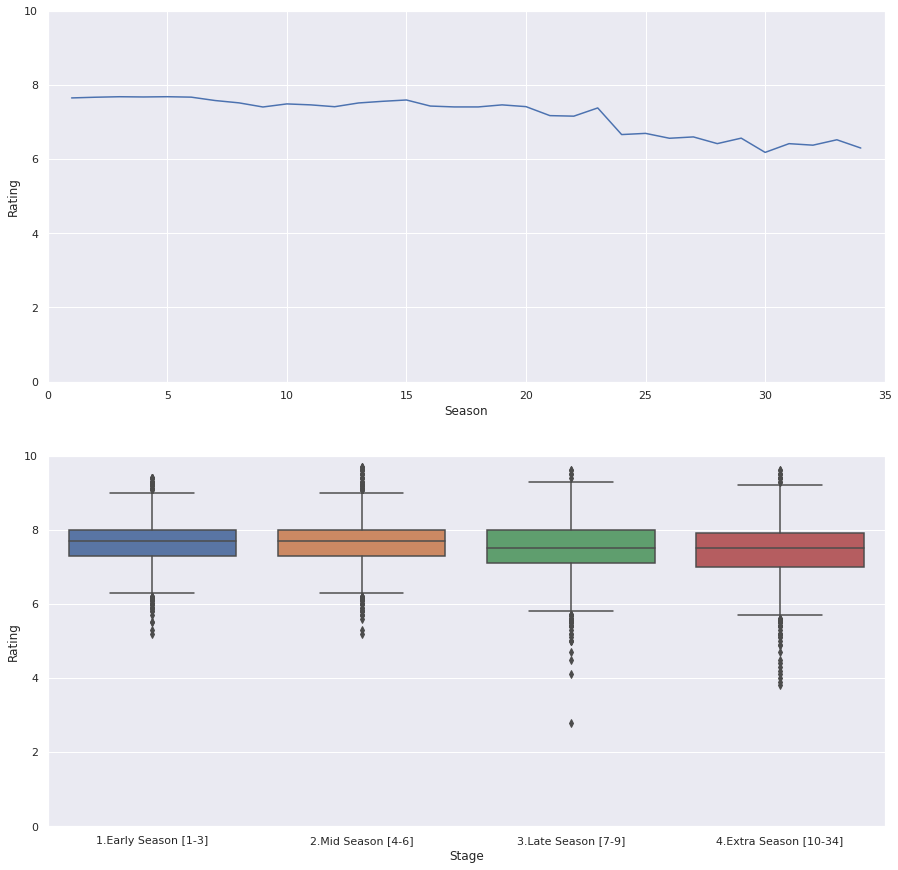

In [7]:
# Preparing DataFrames
## Data Frame ax = 1
df_a
df_a_season_rating = df_a[['Season', 'Rating']]
df_a_season_rating_grouped = df_a_season_rating.groupby('Season').mean()

## Data Frame ax = 2
df_a_season_rating_clean = df_a_season_rating.dropna(axis=0)

df_a_season_rating_clean['Stage'] = math.nan
for ind in df_a_season_rating_clean.index:
    if df_a_season_rating_clean['Season'][ind] <= 3.0:
      df_a_season_rating_clean['Stage'][ind] = '1.Early Season [1-3]'
    elif df_a_season_rating_clean['Season'][ind] >= 4.0 and df_a_season_rating['Season'][ind] < 7.0:
      df_a_season_rating_clean['Stage'][ind] = '2.Mid Season [4-6]'
    elif df_a_season_rating_clean['Season'][ind] >= 7.0 and df_a_season_rating['Season'][ind] < 10.0:
      df_a_season_rating_clean['Stage'][ind] = '3.Late Season [7-9]'
    else:
      df_a_season_rating_clean['Stage'][ind] = '4.Extra Season [10-34]'

df_a_season_rating_clean_grouped = df_a_season_rating_clean[['Stage', 'Rating']].groupby('Stage').mean()

# Plotting with Seaborn
sns.set(rc = {'figure.figsize':(15,15)})
sns.set_style("darkgrid")

fig, axes = plt.subplots(2, 1)

ax1 = sns.lineplot(data = df_a_season_rating_grouped, 
                   x = 'Season', y = 'Rating',
                   ax=axes[0])
ax1.set(ylim=(0, 10))
ax1.set(xlim=(0, 35))


ax2 = sns.boxplot(data = df_a_season_rating_clean, 
                   x = 'Stage', y = 'Rating',
                   ax=axes[1])
ax2.set(ylim=(0, 10))


# At first glance there does not seem to be any significant change of Episode
# Rating across Seasons [1-9], with the only real noticeable change starting
# around season 20 as seen in ax1 (Top). When grouped by our defined Series Stages
# there also doesnt appear to be any actual significant change between them.
# However, there are quite a few of outliers that must be dealt with before
# we can employ a Student's T-test in order to conclude that there are no 
# significant differences between Series Stage pairs.

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


[(0.0, 10.0)]

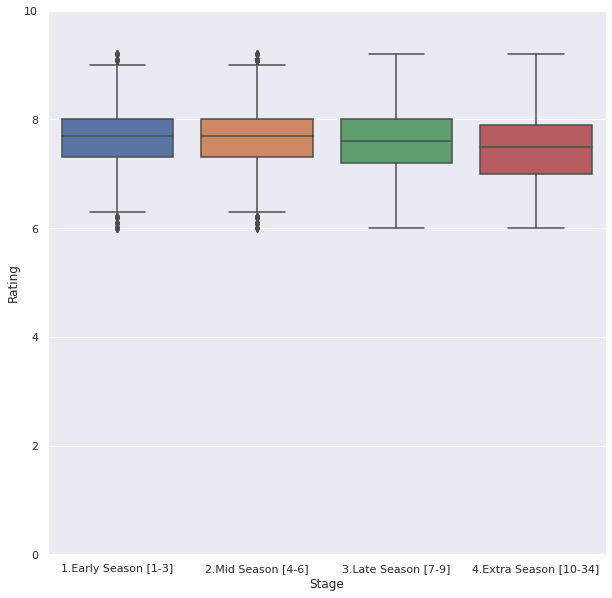

In [10]:
# Getting rid of whole-sample outliers
df_a_season_rating_outlier = df_a_season_rating_clean[['Rating', 'Stage']]

for x in ['Rating']:
    q75,q25 = np.percentile(df_a_season_rating_outlier.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df_a_season_rating_outlier.loc[df_a_season_rating_outlier[x] < min,x] = np.nan
    df_a_season_rating_outlier.loc[df_a_season_rating_outlier[x] > max,x] = np.nan

df_a_season_rating_outlier['Rating'].isna().sum()

sns.set(rc = {'figure.figsize':(10,10)})
sns.set_style("darkgrid")

ax2 = sns.boxplot(data = df_a_season_rating_outlier, 
                   x = 'Stage', y = 'Rating'
                   )
ax2.set(ylim=(0, 10))

 


In [ ]:
# Students T-Test Independent One Sided
import pandas as pd
from scipy.stats import ttest_ind
group1 = df_a_season_rating_outlier[df_a_season_rating_outlier['Stage']=='1.Early Season [1-3]']
group2 = df_a_season_rating_outlier[df_a_season_rating_outlier['Stage']=='2.Mid Season [4-6]']
group3 = df_a_season_rating_outlier[df_a_season_rating_outlier['Stage']== '3.Late Season [7-9]']
group4 = df_a_season_rating_outlier[df_a_season_rating_outlier['Stage']=='4.Extra Season [10-34]']


G1_G2 = ttest_ind(group1['Rating'].dropna(), group2['Rating'].dropna(), alternative = 'greater')
G1_G3 = ttest_ind(group1['Rating'].dropna(), group3['Rating'].dropna(), alternative = 'greater')
G1_G4 = ttest_ind(group1['Rating'].dropna(), group4['Rating'].dropna(), alternative = 'greater')

G2_3 = ttest_ind(group2['Rating'].dropna(), group3['Rating'].dropna(), alternative = 'greater')
G2_4 = ttest_ind(group2['Rating'].dropna(), group4['Rating'].dropna(), alternative = 'greater')

G3_4 = ttest_ind(group3['Rating'].dropna(), group4['Rating'].dropna(), alternative = 'greater')

list_significance = [G1_G2, G1_G3, G1_G4, G2_3, G2_4, G3_4]

df_significance = pd.DataFrame(list_significance)
df_significance.index = ['Early_Mid', 'Early_Late', 'Early_Extra', 'Mid_Late', 'Mid_Extra', 'Late_Extra']
df_significance['statistic'] = df_significance['statistic'].round(2)
df_significance['pvalue'] = df_significance['pvalue'].round(2)
print(df_significance)

,statistic,pvalue
Early_Mid,-0.46,0.65
Early_Late,9.32,0.00
Early_Extra,15.12,0.00
Mid_Late,9.69,0.00
Mid_Extra,15.49,0.00
Late_Extra,5.39,0.00


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


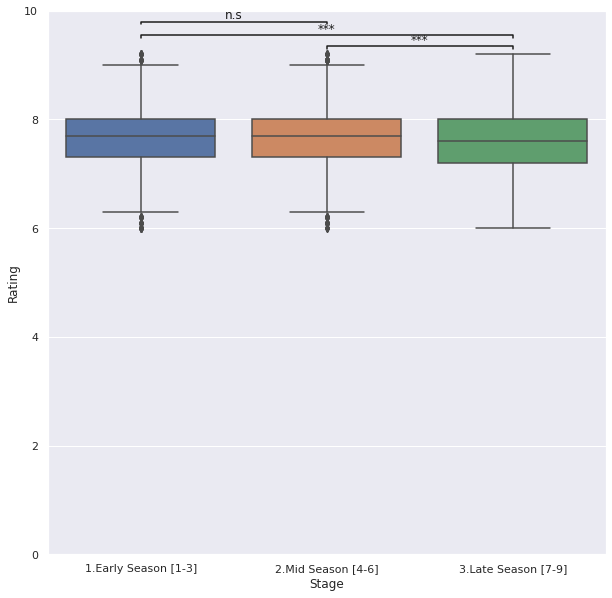

In [11]:
# Plotting results with significance p < 0.05
df_a_season_rating_outlier = df_a_season_rating_clean[['Rating', 'Stage']]

for x in ['Rating']:
    q75,q25 = np.percentile(df_a_season_rating_outlier.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df_a_season_rating_outlier.loc[df_a_season_rating_outlier[x] < min,x] = np.nan
    df_a_season_rating_outlier.loc[df_a_season_rating_outlier[x] > max,x] = np.nan

df_a_season_rating_outlier['Rating'].isna().sum()

df_a_rstages = df_a_season_rating_outlier[df_a_season_rating_outlier['Stage'].isin( ['1.Early Season [1-3]', '2.Mid Season [4-6]', '3.Late Season [7-9]'])]

ax2 = sns.boxplot(data = df_a_rstages, 
                   x = 'Stage', y = 'Rating'
                   )
ax2.set(ylim=(0, 10))


x1, x2 = 0, 2   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = df_a_season_rating_outlier['Rating'].max() + 0.3, 0.05, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "***", ha='center', va='bottom', color=col)


x1, x2 = 1, 2   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = df_a_season_rating_outlier['Rating'].max() + 0.1, 0.05, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "***", ha='center', va='bottom', color=col)


x1, x2 = 0, 1   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = df_a_season_rating_outlier['Rating'].max() + 0.55, 0.05, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "n.s", ha='center', va='bottom', color=col)

plt.show()

In [ ]:
# Conclusions


,statistic,pvalue
Early_Mid,-0.46,0.68
Early_Late,9.32,0.00
Early_Extra,15.12,0.00
Mid_Late,9.69,0.00
Mid_Extra,15.49,0.00
Late_Extra,5.39,0.00
